In [7]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from azure.ai.vision.imageanalysis.models import VisualFeatures

from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

pip install scikit-image

pip install azure-ai-vision-imageanalysis

In [10]:
from dotenv import load_dotenv
import os

# Încarcă variabilele de mediu din fișierul .env
load_dotenv()

True

In [11]:
'''
Authenticate
Authenticates your credentials and creates a client.
'''
subscription_key = os.environ["VISION_KEY"]
endpoint = os.environ["VISION_ENDPOINT"]
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'\nEND - Authenticate\n'

In [20]:
def getFrameForBikeImage(imagePath):
    bike_frame = []
    img = open(imagePath, "rb")
    result = computervision_client.analyze_image_in_stream(img, visual_features=[VisualFeatureTypes.objects])
    for ob in result.objects:
        if (ob.object_property == "bicycle"):
            bike_frame.append([ob.rectangle.x, ob.rectangle.y, ob.rectangle.x + ob.rectangle.w, ob.rectangle.y + ob.rectangle.h])
    return bike_frame

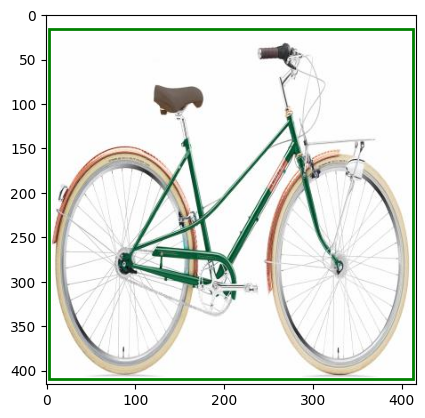

In [43]:
imagePath = "bikes/bike01.jpg"

bikeFrame = getFrameForBikeImage(imagePath)
# show these differences on the image
im = Image.open(imagePath)
fig = plt.imshow(im)
for frame in bikeFrame:
    fig.axes.add_patch(plt.Rectangle(xy = (frame[0], frame[1]), width = frame[2]-frame[0], height = frame[3]-frame[1], fill = False, color = "green", linewidth = 2))

plt.show()